In [1]:
from collections import defaultdict
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import spatial
# from scipy.stats import fisher_exact, chi2_contingency

# Correlation of change of synthesis rate, decay rate and expression level

    Synthesis rate vs. TPM
    Decay rate vs. TPM

## 1. Synthesis rate vs. expression level

/home/chenzonggui/miniconda3/envs/py3/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/chenzonggui/miniconda3/envs/py3/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/chenzonggui/miniconda3/envs/py3/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


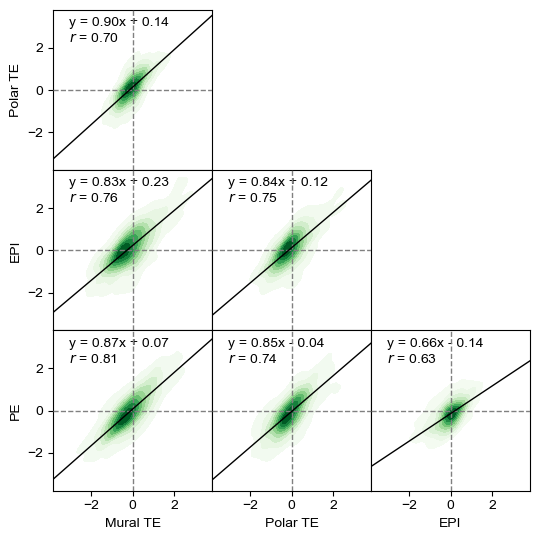

In [8]:
cts = ["muralTE", "polarTE", "EPI", "PE"]
names = ["Mural TE", "Polar TE", "EPI", "PE"]

fig, axs = plt.subplots(len(cts) - 1, len(cts) - 1, figsize=(5.5, 5.5), gridspec_kw=dict(hspace=0, wspace=0))
for i in range(len(cts)):
    for j in range(len(cts) - 1):
        if i == 0:
            continue
        ax = axs[i-1][j]
        if i <= j:
            ax.set_visible(False)
            continue
        plt.sca(ax)
        ct1, ct2 = cts[i], cts[j]
        name1, name2 = names[i], names[j]
        path1 = "../10_blastocyst/results/halflife/%s.transcript_based.transcript_id.annotated.tsv" % ct1
        path2 = "../10_blastocyst/results/halflife/%s.transcript_based.transcript_id.annotated.tsv" % ct2
        m1 = pd.read_csv(path1, sep="\t", index_col=0)
        m2 = pd.read_csv(path2, sep="\t", index_col=0)
        m = m1.merge(m2, left_index=True, right_index=True, suffixes=[".CT1", ".CT2"])
        m = m[(m["TPM.CT1"] >= 100) & (m["TPM.CT2"] >= 100)]
        vmax = 3.8
        xs = np.log2(m["TPM.CT2"] / m["TPM.CT1"])
        ys = np.log2(m["K.CT2"] / m["K.CT1"])
        flags = (xs > -vmax) & (xs < vmax) & (ys > -vmax) & (ys < vmax)
        xs, ys = xs[flags], ys[flags]
        a, b = np.polyfit(xs, ys, 1)
        r = np.corrcoef(xs, ys)[0][1]
        plt.text(-vmax + 2 * vmax * 0.1, -vmax + 2 * vmax * 0.9, "y = %.2fx %s %.2f" % (a, "+" if b >= 0 else "-", abs(b)))
        plt.text(-vmax + 2 * vmax * 0.1, -vmax + 2 * vmax * 0.8, "$\it{r}$ = %.2f" % r)
        sns.kdeplot(x=xs, y=ys, fill=True, cmap='Greens', zorder=10)
        plt.axvline(0, lw=1, ls="--", color="grey", zorder=20)
        plt.axhline(0, lw=1, ls="--", color="grey", zorder=20)
        plt.plot([-vmax, vmax], [a * -vmax + b, a * vmax + b], lw=1, color="black", zorder=30)
        if j == 0:
            plt.yticks([-2, 0, 2])
            # plt.ylabel("%s\nlog$_2$($\Delta$sythesis rate)" % names[cts.index(ct1)])
            plt.ylabel(name1)
        else:
            plt.yticks([])
            plt.ylabel(None)
        if i == len(cts) - 1:
            plt.xticks([-2, 0, 2])
            plt.xlabel(name2)
            # plt.xlabel("log$_2$($\Delta$TPM)\n%s" % names[cts.index(ct2)])
        else:
            plt.xticks([])
            plt.xlabel(None)
        plt.xlim(-vmax, vmax)
        plt.ylim(-vmax, vmax)
        
plt.tight_layout()
plt.savefig("figures/change_of_tpm_sythesis_rate.pdf", dpi=300)

## 2. Decay rate vs. expression level

/home/chenzonggui/miniconda3/envs/py3/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/chenzonggui/miniconda3/envs/py3/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/chenzonggui/miniconda3/envs/py3/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


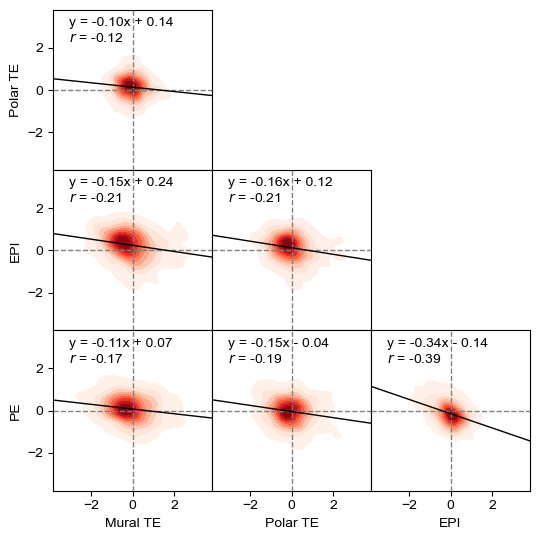

In [9]:
fig, axs = plt.subplots(len(cts) - 1, len(cts) - 1, figsize=(5.5, 5.5), gridspec_kw=dict(hspace=0, wspace=0))
for i in range(len(cts)):
    for j in range(len(cts) - 1):
        if i == 0:
            continue
        ax = axs[i-1][j]
        if i <= j:
            ax.set_visible(False)
            continue
        plt.sca(ax)
        ct1, ct2 = cts[i], cts[j]
        name1, name2 = names[i], names[j]
        path1 = "../10_blastocyst/results/halflife/%s.transcript_based.transcript_id.annotated.tsv" % ct1
        path2 = "../10_blastocyst/results/halflife/%s.transcript_based.transcript_id.annotated.tsv" % ct2
        m1 = pd.read_csv(path1, sep="\t", index_col=0)
        m2 = pd.read_csv(path2, sep="\t", index_col=0)
        m = m1.merge(m2, left_index=True, right_index=True, suffixes=[".CT1", ".CT2"])
        m = m[(m["TPM.CT1"] >= 100) & (m["TPM.CT2"] >= 100)]
        vmax = 3.8
        xs = np.log2(m["TPM.CT2"] / m["TPM.CT1"])
        ys = np.log2(m["D.CT2"] / m["D.CT1"])
        flags = (xs > -vmax) & (xs < vmax) & (ys > -vmax) & (ys < vmax)
        xs, ys = xs[flags], ys[flags]
        a, b = np.polyfit(xs, ys, 1)
        r = np.corrcoef(xs, ys)[0][1]
        plt.text(-vmax + 2 * vmax * 0.1, -vmax + 2 * vmax * 0.9, "y = %.2fx %s %.2f" % (a, "+" if b >= 0 else "-", abs(b)))
        plt.text(-vmax + 2 * vmax * 0.1, -vmax + 2 * vmax * 0.8, "$\it{r}$ = %.2f" % r)
        # plt.scatter(xs, ys, marker=".", color="grey")
        sns.kdeplot(x=xs, y=ys, fill=True, cmap='Reds', zorder=10)
        plt.axvline(0, lw=1, ls="--", color="grey", zorder=20)
        plt.axhline(0, lw=1, ls="--", color="grey", zorder=20)
        plt.plot([-vmax, vmax], [a * -vmax + b, a * vmax + b], lw=1, color="black", zorder=30)
        if j == 0:
            # plt.ylabel("%s\nlog$_2$($\Delta$decay rate)" % name1)
            plt.yticks([-2, 0, 2])
            plt.ylabel(name1)
        else:
            plt.yticks([])
            plt.ylabel(None)
        if i == len(cts) - 1:
            plt.xticks([-2, 0, 2])
            plt.xlabel(name2)
            # plt.xlabel("log$_2$($\Delta$TPM)\n%s" % name2)
        else:
            plt.xticks([])
            plt.xlabel(None)
        plt.xlim(-vmax, vmax)
        plt.ylim(-vmax, vmax)
        
plt.tight_layout()
plt.savefig("figures/change_of_tpm_decay_rate.pdf", dpi=300)